# TDA Mapper Tutorial in R

### Imports
If data is in csv format, we don't need readxl

In [2]:
library(readxl)
library(TDAmapper)
library(igraph)

Warning message:
"package 'igraph' was built under R version 4.0.3"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




### Load data


In [3]:
# This is the path where your file is located
path <- "C:/Users/cashe/OneDrive/Desktop/Data Science/Mississippi River analysis/Cleaned data/Predict_summer_13_backwater.xlsx"
data <- read_excel(path)

New names:
* `` -> ...1



If the data is in csv, use

In [13]:
# data <- read.csv(path)

### Filter data to only select continuous variables

In [4]:
keep <- c("WDP","SECCHI","TEMP","DO","TURB","COND","VEL","SS",
          "PredictedTN","PredictedTP","CHLcal")
data_TDA <- data[,(names(data) %in% keep)]

### Filter function and parameter choice
Our chosen filter function is the projection onto the first 2 principle components of the data. The function prcomp returns the PCA analyis. It has the following parameters:

1. center = TRUE : centers every attribute to have a mean of 0.
2. scale. = TRUE : scales every attribute to have a variance of 1.
3. retx = TRUE: lets us retain the rotated variables and data projections

In [5]:
pca <- prcomp(data_TDA,center = TRUE,scale.=TRUE,retx = TRUE)

We want our filter values to be the projections onto the first 2 principle components, so we will pull them from the pca object like this:

In [6]:
proj1 <- pca$x[,1]
proj2 <- pca$x[,2]

mapper2D has the following parameters:

1. distance_matrix : the distance matrix of every point in the dataset
2. filter_values : the resulting values of our filter function
3. num_intervals : the number of intervals to split the filter values into on each axis
4. percent_overlap: how much the intervals should overlap with eachother
5. num_bins_when_clustering: the number of bins when clustering into nodes

In [7]:
# Handy function in R to create the distance matrix
distance_matrix <- dist(data_TDA)
# Because we are using mapper2D, both filter values
# and num_intervals must be vectors of length 2
filter_values <- list(proj1,proj2)
num_intervals <- c(6,6)
percent_overlap <- 25
num_bins <- 8

### Define mapper object
Using selected parameters we can create a mapper object like so

In [8]:
map <- mapper2D(distance_matrix = distance_matrix,
                    filter_values = filter_values,
                    num_intervals = num_intervals,
                    percent_overlap = percent_overlap,
                    num_bins_when_clustering = num_bins)

[1] "Level set has only one point"
[1] "Level set is empty"
[1] "Level set has only one point"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set has only one point"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set is empty"
[1] "Level set has only one point"
[1] "Level set is empty"
[1] "Level set is empty"


### Visualize output
To visualize our graph, we need to decide on how to label our vertices, and how to size our vertices. For simplicity, we will label the vertices by the number of points in it, and also size the vertices proportional to the number of points in it.

In [39]:
# This is the label paramater in plot
# FUN parameter indicates how to label each vertice,in this
# case we are labeling it by the length function
vertex.label <- lapply(map$points_in_vertex, FUN = length)

# This function determines the sizing of each vertex in the mapper output
scale_vertex_by_points <- function(mapper_object, scalar_constant = 75){
  vertex_size <- c()
  # Iterate through each vertex, count the number of points contained in it
  for (i in mapper_object$points_in_vertex){
    append_value <- length(na.omit(i))
    vertex_size <- append(vertex_size, append_value)
  }
  # Function to normalize the igraph vertex scalar
  normalize_vector <- function(x) {x / sqrt(sum(x^2))}
  # Generate normalized vertex scalar, multiply by scalar_constant (scalar_constant = 75 by default)
  vertex_size <- normalize_vector(vertex_size) * scalar_constant
  return(vertex_size)
}

We need to clarify what we want to plot by getting a graph object from the map

In [32]:
Graph <- graph.adjacency(map$adjacency, mode="undirected")

We can now plot our output. There are many parameters that can be tweaked, but we found these ones to produce good outputs.

Warning message in text.default(x, y, labels = labels, col = label.color, family = label.family, :
"font family not found in Windows font database"


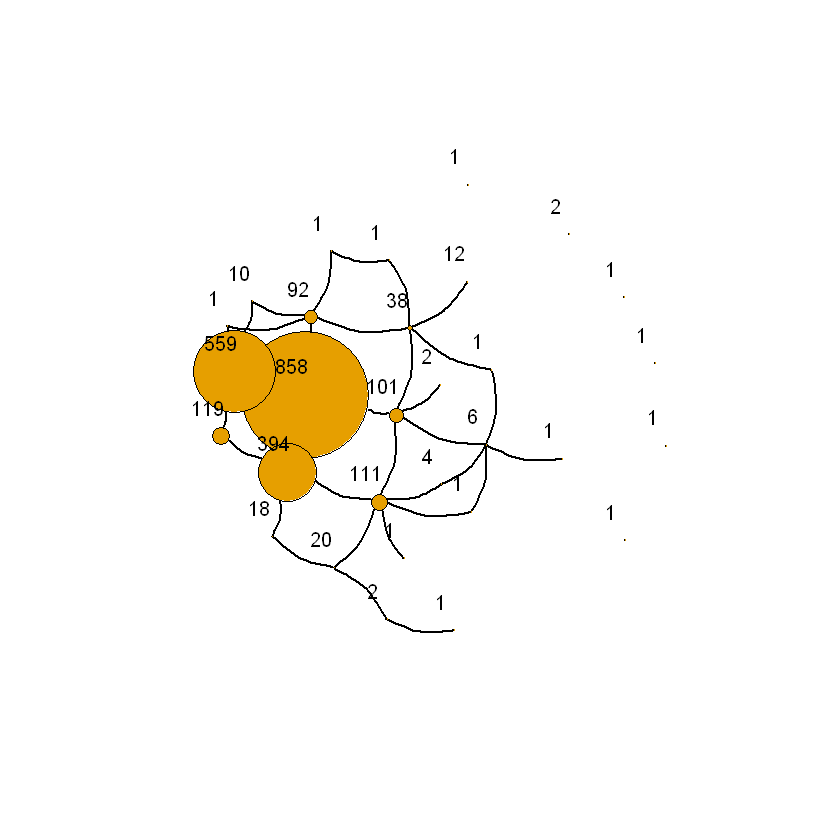

In [42]:
plot(Graph, 
     layout = layout.auto(Graph),
     vertex.size = scale_vertex_by_points(map),
     vertex.label = vertex.label,
     vertex.label.family="Helvetica",
     vertex.label.color=c("black"),
     vertex.label.dist= -2,
     vertex.label.degree=20,
     edge.color="black",                           # Edge color
     edge.width=2,                                 # Edge width, defaults to 1
     edge.arrow.size=1,                            # Arrow size, defaults to 1
     edge.arrow.width=1,                           # Arrow width, defaults to 1
     edge.lty="solid",                             # Line type, could be 0 or “blank”, 1 or “solid”, 2 or “dashed”, 3 or “dotted”, 4 or “dotdash”, 5 or “longdash”, 6 or “twodash”
     edge.curved=0.3
)

### Statistical Analysis
We can also look at individual vertices within an output to get summary statistics of each variable for a given vertice, as well as look at the intersection between vertices.

First, lets look at the number of vertices in this output:

In [10]:
map$num_vertices

[1] 30

Now, lets look at the members of a random vertice by usint the points_in_vertex attribute of the mapper object:

In [13]:
map$points_in_vertex[[25]]

[1]   37  173  175  176  203  204  239  250  370  371  397  399  415  447  449
 [16]  481  511  532  590  611  612  614  615  660  694  700  703  738  880  882
 [31]  885  898  900  930  932  934  936  941  970 1048 1049 1061 1062 1066 1082
 [46] 1083 1109 1110 1131 1132 1136 1145 1146 1158 1187 1188 1191 1214 1224 1225
 [61] 1226 1227 1228 1229 1230 1231 1233 1237 1238 1239 1240 1241 1242 1244 1251
 [76] 1254 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1271 1276 1277
 [91] 1278 1299 1303 1314 1315 1316 1322 1324 1325 1332 1342 1348 1349 1350 1354
[106] 1356 1367 1372 1377 1378 1379 1385 1386 1388 1390 1391 1394 1395 1424

These are all the indices of the points in the original dataset that are in vertex 25. But which vertex is this? We can get size of this vertice and look for it on the output by using the length function.

In [14]:
length(map$points_in_vertex[[25]])

[1] 119

Lets say we want to find how many datapoints that the 858 vertex and 559 vertex have in common. First, we need to figure out where in the points_in_vertex attribute these vertices are. To see the size of each vertex in the mapper object, we can use lapply like this:

In [20]:
sizes <- as.numeric(lapply(map$points_in_vertex, FUN = length))
sizes

[1]   1   2   1   1  12   1   1   1   1  38  92  10   1   1   2   6 101 858 559
[20]   1   4   1 111 394 119  20  18   1   2   1

To get the indices of the vertices we want, we can use the which function

In [28]:
which(sizes == 858)

[1] 18

In [29]:
which(sizes == 559)

[1] 19

To get the intersection of these vertices, we use the intersect function like so:

In [31]:
intersection <- intersect(map$points_in_vertex[[18]],map$points_in_vertex[[19]])
intersection

[1]   30   37   52   70  156  157  173  190  198  199  204  225  226  231  234
 [16]  237  238  240  242  250  251  261  263  288  289  293  294  297  299  300
 [31]  301  302  304  305  308  313  345  351  352  353  354  355  356  358  359
 [46]  361  363  365  366  370  371  374  395  397  398  399  400  403  409  443
 [61]  468  469  470  487  496  497  532  552  557  559  562  563  565  567  589
 [76]  599  601  602  607  608  609  616  617  618  629  630  638  641  642  644
 [91]  648  649  650  652  654  659  661  663  677  679  680  682  683  696  700
[106]  702  703  704  706  711  712  717  719  722  725  726  728  734  747  753
[121]  767  768  782  784  788  790  791  800  801  813  825  826  847  853  880
[136]  882  885  894  900  903  905  906  932  933  934  941  943  946  947  954
[151]  958  960  964  965  972  987  991  993  995 1001 1002 1003 1005 1006 1007
[166] 1008 1009 1012 1017 1018 1022 1023 1034 1036 1049 1055 1057 1063 1068 1069
[181] 1070 1074 1082 1083 1090 1095 1109 1110 1132 1136 1142 1143 1151 1152 1153
[196] 1156 1158 1161 1176 1177 1181 1183 1187 1188 1190 1191 1192 1194 1199 1201
[211] 1204 1206 1212 1223 1224 1225 1226 1242 1251 1263 1267 1269 1270 1299 1300
[226] 1304 1312 1314 1351 1360 1361 1363 1385 1386 1390 1394 1424 1425

So all these indices in data_TDA are located in both vertices 18 and 19 in the output. If we want to see what percentage of each vertice this is, we can do:

In [33]:
length(intersection)/length(map$points_in_vertex[[18]])

[1] 0.2773893

In [34]:
length(intersection)/length(map$points_in_vertex[[19]])

[1] 0.4257603

So 27% of vertex 18 is also in 19, and 42% of 19 is also in 18.

Now, we want to visualize the differences of the vertices when it comes to each variable. We will use suspendid solids (SS) as an example. This function to produce a boxplot takes the following parameters:

map - the mapper object

data - the data used to create the mapper object

var - the variable we want to analyze

In [79]:
produce_boxplot <- function(map,data,var){
  # Need to label each point by the vertex it is in
  # Loop through the points in vertex list and assign the data
  
    # This is an annoying function of R because R likes to turn data into "tibbles" but we want data frames
    data <- as.data.frame(data)
    
    data$VID <- 0
  for(i in 1:length(map$points_in_vertex)){
    # Assign the points in this vertex to this vertex
    data[map$points_in_vertex[[i]],"VID"] <- i
  }
  
  # Now make a boxplot for this variable

  boxplot(data[,var]~VID,data=data, main=var,
            xlab="Vertex ID", ylab=var)
}

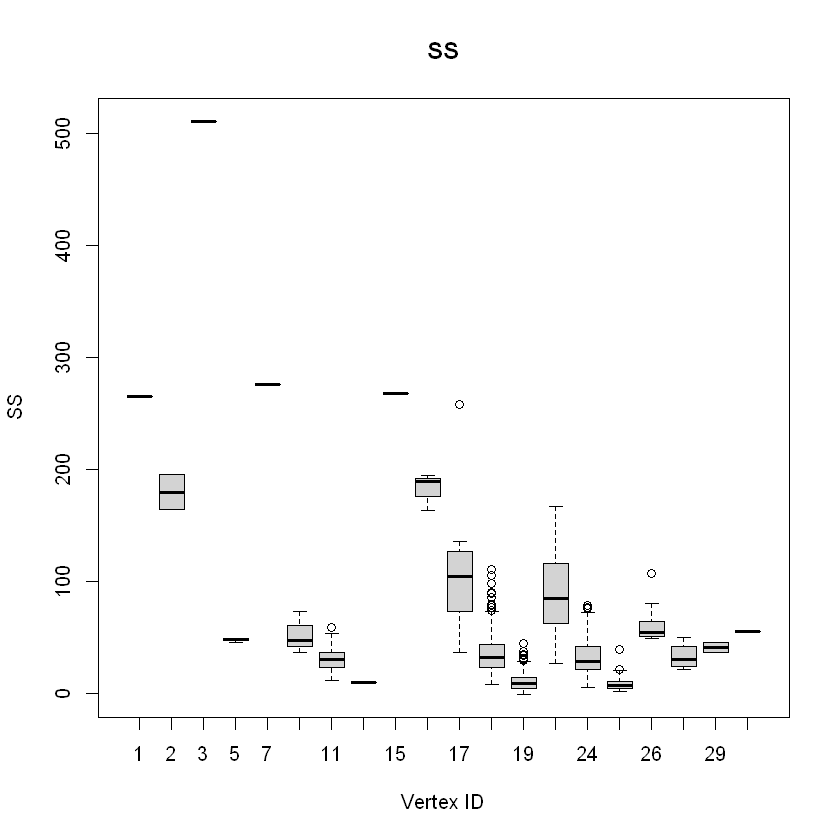

In [80]:
produce_boxplot(map,data_TDA,"SS")

Now we can see visually the summary of suspendid solids for each vertex.